# Numerical integration and extinction rates in large random ecosystems

Requirements
+ matplotlib
+ numpy
+ scipy


**A note on cloud-hosted notebooks.** If you are running a notebook on a cloud provider, such as Google Colab or CodeOcean, remember to save your work frequently. Cloud notebooks will occasionally restart after a fixed duration, crash, or prolonged inactivity, requiring you to re-run code.

<!-- [Click here to open this notebook in Colab](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/hw/lotka_volterra.ipynb) -->
Open this notebook in Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/hw/lotka_volterra.ipynb)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The Lotka-Volterra model

The Lotka-Volterra model is a simple model of predator-prey interactions in a complex ecosystem. It is given by the following system of differential equations,

$$
    \frac{dn_i}{dt} = n_i \left( r_i + \sum_{j=1}^N A_{ij} n_j  - d_i n_i\right)
$$

where $n_i$ is the number of individuals of species $i$, $r_i > 0$ is the intrinsic growth rate of species $i$, $d_i > 0$ is a population-limitation such as overcrowding or resource scarcity, that prevents species $i$ from continuing to grow in number indefinitely. The term $A_{ij}$ is the interaction coefficient between species $i$ and $j$. The matrix $A$ is assumed to be traceless ($A_{ii}=0$ for all $i$), because the terms $r_i$ and $d_i$ cover the self-terms already. If $A_{ij} > 0$, then species $i$ benefits from the presence of species $j$, such as through symbiotic interactions, and if $A_{ij} < 0$, then species $i$ is harmed by the presence of species $j$, such as by predation. If $A_{ij} = 0$, then species $i$ and $j$ do not directly interact, though they may indirectly interact through other species. The total number of species is given by $N$


### A single species

We can understand the behavior of Eq. (1) by first considering the case where $N=1$, in which case the dynamics become a one-dimensional ordinary differential equation,

$$
    \frac{dn_1}{dt} = n_1 \left( r_1 - d_{1} n_1 \right)
$$

We may recognize that this equation defines sigmoidal growth dynamics, with exact solution given by the logistic growth curve,

$$
    n_1(t) = n(0)
$$
xxx

When $n_1(t)$ is small, the species population grows exponentially. The overcrowding term, $d_1$ causes the population density to reach an asymptote. This equation is sometimes reparameterized in order to make the asymptote more explicit $XX$, 

$$
    xxx
$$
where $N_\text{max}$ is called the *carrying capacity* of the population.


### Predator-prey dynamics

Another well-known specific case of Eq. 1 is predator-prey dynamics when $N=2$. In this case, the model is given by

$$
    \frac{dn_1}{dt} = n_1 \left( r_1 + A_{11} n_1 + A_{12} n_2 \right)
$$

$$
    \frac{dn_2}{dt} = n_2 \left( r_2 + A_{21} n_1 + A_{22} n_2 \right)
$$

The first equation describes the growth rate of the prey, which increases exponentially in the absence of predators, and decreases in the presence of predators. The second equation describes the growth rate of the predator, which increases in the presence of prey, and decreases exponentially in the absence of prey. The interaction coefficients $A_{11}$ and $A_{22}$ are the self-interaction coefficients, and $A_{12}$ and $A_{21}$ are the interaction coefficients between the prey and the predator. The predator-prey model exhibits oscillatory dynamics, and has previously been used to model the dynamics of lynxes and hares in the Canadian wilderness.

### Random ecosystems

What do we expect for the dynamics of the predator-prey model in the limit of large ecosystems ($N \to \infty$)? Experimentally, each term in the species interaction matrix $A_{ij}$ requires isolating a pair of species, and measuring how they interact. Additionally, measuring the intrinsic growth and saturation rates $r_i$, $d_i$ requires an additional set of $N$ isolation experiments, for a total of $N(N+1)$ total experiments in order to pin down the values of every parameter in Eq. 1. This may be feasible in the case of lynxes and hares, but it becomes more fraught for a coral reef ($N \sim XX$), or the gut microbiome ($N \sim XX$).

In the spirit of May's work, we are therefore going to study the behavior of Eq. 1 when all of the parameters are drawn from random distributions: $r_i \sim \mathcal{N}(0, 1)$, $A_{ij} \sim \mathcal{N}(0, 1)$. Physically, that means that we assume an ecosystem with a roughly equal number of mutualistic and antagonistic interactions, and we assume that equal numbers of species grow or die out in isolation, much like the lynxes and hares. Importantly, the interactions $A$ can be *non-reciprocal*: the effect of species $i$ in the growth rate of species $j$ may not be the same as the effect of species $j$ in the growth rate of species $i$, and so $A_{ij} \neq A_{ji}$ in general (the predator prey case above is a good example of a strongly non-reciprocal system. 

### To Do

*Please complete the following tasks and answer the included questions. You can edit a Markdown cell in Jupyter by double-clicking on it. To return the cell to its formatted form, press `[Shift]+[Enter]`.*

1. Implement the random Lotka-Volterra model Eq. 1. We will numerically integrate this system using the built-in scipy ODE solver `scipy.integrate.solve_ivp` with the integration method `RK45` (the embedded method Runge-Kutta 4(5)). 

```
    Your Answer: complete the code below
```

2. We can accelerate the simulation by using a more efficient method. Implicit methods allow larger timesteps or more accurate updates, by inverting the Jacobian (a locally linear approximation of the dynamics) at each timestep. Recall that, for a system of ODEs, the Jacobian is given by the matrix of partial derivatives of the right-hand side of the equations with respect to the each of the state variables. Calculate the analytic jacobian of the Lotka-Volterra model, and then use it to implement an implicit method. This will allow us to instead use the built-in scipy ODE solver `scipy.integrate.solve_ivp` with the implicit integration method `Radau`.

```
    Your Answer: complete the code below
```

3. One interesting phenomenon you will observe is that not all species survive at equilibrium, which we define as a species having a number of individuals less than our precision floor as $t \to \infty$. Explore what happens when you run the simulation many times. Plot the final distribution of population sizes. What does this distribution resemble? What would you expect the distribution of population sizes to look like if there were *no interactions* ($A_{ij}=0$, $i\neq j$)? What would you expect the distribution of population sizes to look like if we instead sampled from a distribution of interactions that is *not* centered at zero? *Hint: you will find that the analytic results of [Servan et al. 2018](https://www.nature.com/articles/s41559-018-0603-6) confirm your numerical observations.*

```
    Your Answer: 
```

4.  Suppose that, instead of sampling from the normal distribution, we instead sampled from a heavy-tailed distribution (a distribution with more very large values). How would you expect this to affect the dynamics of the system? You can try estimating this by modifying your simulation, or based on your intuition for the dynamics of the system. *Hint: the steady-state, $\lim_{t\to\infty} n(t)$, is not the only thing that might change*

```
    Your Answer: 
```

In [2]:
from scipy.integrate import solve_ivp

class LotkaVolterra:
    """
    An implementation of the Lotka-Volterra model

    Parameters:
        n (int): number of species
        sigma (float): the scale of the randomly-sampled elements, Defaults to 1.0
        d (float): the density-limitation strength. Defaults to 10.0

    """

    def __init__(self, N, sigma=1.0, d=12.5, random_state=None):
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  The instructor solution is ten lines and uses np.random.normal() and 
        #  np.random.seed()
        #
        #
        ################################################################################
        # raise NotImplementedError("Implement this method")

        self.N = N
        self.sigma = sigma
        self.random_state = random_state
        np.random.seed(self.random_state)
        ## Create a hollow random matrix
        self.r = np.random.normal(size=(self.N,), scale=self.sigma)
        self.A = np.random.normal(size=(self.N, self.N), scale=self.sigma)
        self.A = self.A - np.diag(self.A)
        self.d = d


    def rhs(self, t, n):
        """
        Given a time and a state vector, return the right-hand side of the Lotka-Volterra equations
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  The instructor solution is one line
        #
        #
        ################################################################################
        # raise NotImplementedError("Implement this method")

        return n * (self.r + np.dot(self.A, n) - self.d * n)
    

class LotkaVolterraWithJacobian(LotkaVolterra):
    """
    A subclass of the Lotka-Volterra model that adds a Jacobian functions
    """

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def jacobian(self, t, n):
        """
        Given a time and a state vector, return the Jacobian of the Lotka-Volterra equations
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE.
        #
        #
        ################################################################################
        # raise NotImplementedError("Implement this method")

        return np.diag(self.r + np.dot(self.A, n)) + self.A * n[:, None] - self.d * n


### Test and use your code

+ You don't need to write any code below, these cells are just to confirm that everything is working and to play with your implementation
+ If you are working from a local fork of the entire course, then you already have access to the solutions. In this case, make sure to `git pull` to make sure that you are up-to-date (save your work first).
+ If you are working from a single downloaded notebook, or are working in Google Colab, then you will need to manually download the solutions file from the course repository. The lines below will do this for you.

In [ ]:
import os
import requests
# Check if the "solutions" directory exists. If not, create it and download the solution file
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')

# Now download the solution file into the directory we just created
url = 'https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/allencahn_spectral.py'
response = requests.get(url)
file_path = os.path.join('solutions', 'sandpile.py')
with open(file_path, 'wb') as file:
    file.write(response.content)
print(f'File saved to {file_path}')
# Now download the solution file into the directory we just created
url = 'https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/allencahn.py'
response = requests.get(url)
file_path = os.path.join('solutions', 'sandpile.py')
with open(file_path, 'wb') as file:
    file.write(response.content)
print(f'File saved to {file_path}')

Text(0.5, 1.0, 'Lotka Volterra Dynamics with Implicit solver')

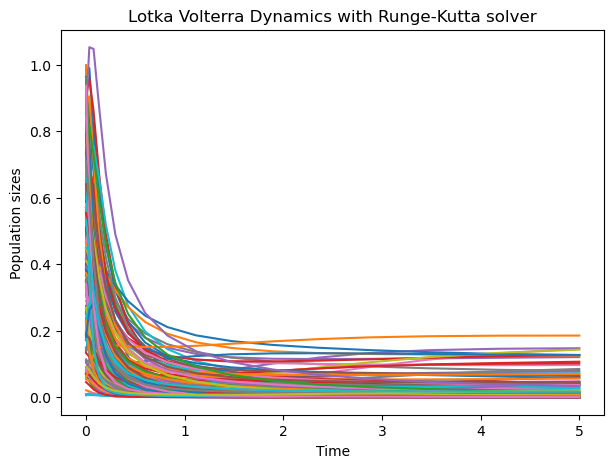

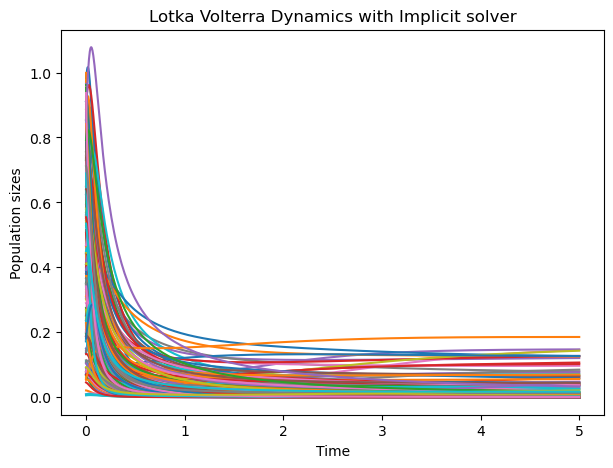

In [3]:
## Initialize simulation parameters
N = 200
lv = LotkaVolterra(N, random_state=0)
# initial population sizes of all species should be greater than one
n0 = np.random.uniform(size=(N,))
sol = solve_ivp(lv.rhs, [0, 5], n0, method="RK45")
plt.figure(figsize=(7, 5))
plt.plot(sol.t, sol.y.T);
plt.xlabel("Time")
plt.ylabel("Population sizes")
plt.title("Lotka Volterra Dynamics with Runge-Kutta solver")


lvj = LotkaVolterraWithJacobian(N, random_state=0)
sol = solve_ivp(lvj.rhs, [0, 5], n0, jac=lvj.jacobian, method="Radau")
plt.figure(figsize=(7, 5))
plt.plot(sol.t, sol.y.T);
plt.xlabel("Time")
plt.ylabel("Population sizes")
plt.title("Lotka Volterra Dynamics with Implicit solver")

The mean number of survivors is 94.0
The standard deviation of the number of survivors is 36.29380112360787


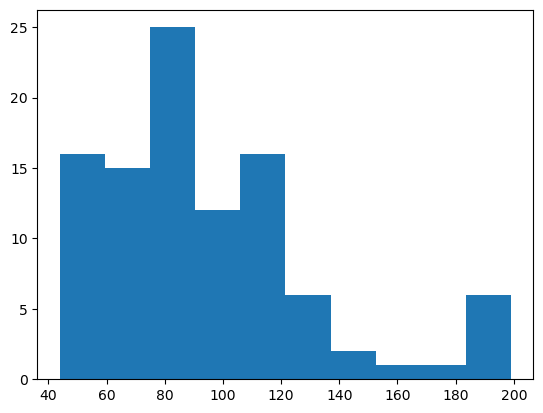

In [18]:
## Sample many random ecosystems, and study their asymptotic dynamics

num_survivors = list()
for seed in range(100):
    # lvj = LotkaVolterraWithJacobian(N, random_state=seed)
    # n0 = np.random.uniform(size=(N,))
    # sol = solve_ivp(lvj.rhs, [0, 30], n0, jac=lvj.jacobian, method="Radau")

    lv = LotkaVolterra(N, random_state=seed)
    n0 = np.random.uniform(size=(N,))
    sol = solve_ivp(lv.rhs, [0, 60], n0, method="RK45")

    num_survive = np.sum(sol.y[:, -1] > 1e-8)
    num_survivors.append(num_survive)

plt.hist(num_survivors)
print(f"The mean number of survivors is {np.mean(num_survivors)}")
print(f"The standard deviation of the number of survivors is {np.std(num_survivors)}")